# Trabajo final de Técnicas algorítmicas

## Evaluación escrita individual


Estudiante: Alessio Bocco

In [179]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random

## Problema 1

Considerar la función recursiva f deﬁnida a continuación.

### ¿Qué valores retornan las expresiones f(3) y f(5)?

La siguiente figura muestra un diagrama de árbol de las recursiones que realiza la funcion evaluada en 3

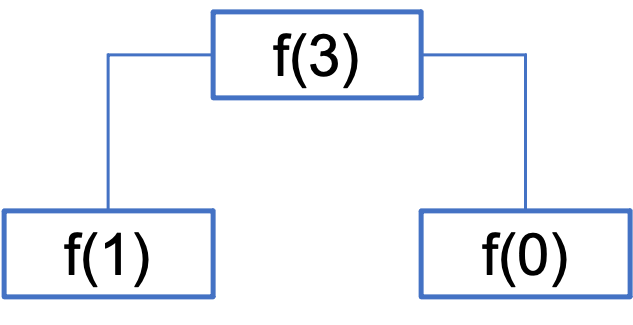

El resultado de la función es 1 + 0 = 1

La siguiente figura muestra un diagrama de árbol de las recursiones que realiza la funcion evaluada en 5

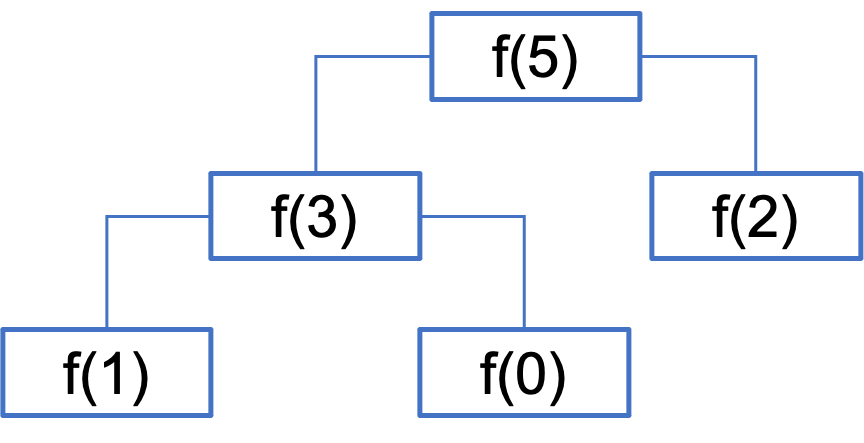

El resultado de la función es 1 + 0 + 2 = 3

### ¿Qué complejidad computacional tiene esta función?

Esta función tiene una complejidad de O(2^n). Esto se debe a que la función es recursiva y realiza dos llamadas recursivas en su caso base (n-2) + (n-3), lo que significa que cada vez que se llama a f() se duplica la cantidad de llamadas recursivas. La conclusión se verifica al contar la cantidad de recursiones cuando se aplica la función sobre una secuencia de números. 

In [180]:
# Definicion de la la clase Counter para contar la cantidad de recursiones
class Contador(object) :
    def __init__(self, fun) :
        self._fun = fun
        self.contador = 0
    def __call__(self,*args, **kwargs) :
        self.contador += 1
        return self._fun(*args, **kwargs)

# Definición de la función f()
def f(n): 
    if n <=2:
        ret = n 
    else:
        ret = f(n-2) + f(n-3) 
    return ret

# Asignacion de la clase Counter a la funcion f()
f = Contador(f)

In [200]:
# Creacion de una lista para guardar la cantidad de reucrsiones
count = []
# Aplicar la funcin f sobre una secuencia de números creciente
for n in range(1, 10, 1):
    f(n)
    print( '# de veces que f() es llamada =', f.contador)
    # Agregar la cantidad de recursiones a la lista
    count.append(f.contador)


# de veces que f() es llamada = 2529
# de veces que f() es llamada = 2530
# de veces que f() es llamada = 2533
# de veces que f() es llamada = 2536
# de veces que f() es llamada = 2541
# de veces que f() es llamada = 2548
# de veces que f() es llamada = 2557
# de veces que f() es llamada = 2570
# de veces que f() es llamada = 2587


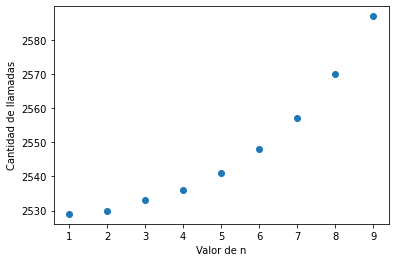

In [201]:
plt.scatter(x = range(1, 10, 1), y = count)
plt.xlabel("Valor de n")
plt.ylabel("Cantidad de llamadas")
plt.show()

Como se observa en la figura, a medida que aumenta el valor de n, la cantidad de ejecuciones crece exponencialmente. Con cada incremento de n se agrega una rama más al árbol en lugar de solo una llamada a la función. Adicionalmente, cada rama esta compuesta de otras ramas. Con esto se confirma que la complejidad de la función es exponencial. 

### ¿Cómo se puede plantear un algoritmo de programación dinámica para calcular esta misma función?

In [202]:
def f_dynamic(n): 
    # Creacion del caso base
    array = [0 for i in range(n + 1)] 
    array[0] = 0 
    array[1] = 1 
    array[2] = 2 
    
    # Calculo de valores para la funcion evaluada en más de 2
    for i in range(3, n+1): 
        array[i] = array[i-2] + array[i-3] 
    # Devolver resultados
    return array[n]


In [203]:
# Evaluar si ambas funciones dan el mismo resultado
count = []
# Iterar sobre una secuencia de valores para obtener los resultados de ambas funciones
for n in range(3, 20):
    # Guardar las comparaciones en la lista
    count.append(f(n) == f_dynamic(n))
    
if all(i == True for i in count):
    print("Los resultados son iguales en todas las pruebas") 


Los resultados son iguales en todas las pruebas


A continuación se evalúa el tiempo computacional de ambas versiones

In [216]:
tiempo_recursion = []
# Iterar sobre una secuencia de valores para obtener los resultados de ambas funciones
for n in range(3, 20):
    now = datetime.now()
    f(n)
    after = datetime.now()
    # Guardar los resultados en la lista
    tiempo_recursion.append(after - now)
# Convertir salida a microsegundos
tiempo_recursion = [i.microseconds for i in tiempo_recursion]

In [217]:
tiempo_dinamico = []
# Iterar sobre una secuencia de valores para obtener los resultados de ambas funciones
for n in range(3, 20):
    now = datetime.now()
    f_dynamic(n)
    after = datetime.now()
    # Guardar los resultados en la lista
    tiempo_dinamico.append((after - now))
# Convertir salida a microsegundos
tiempo_dinamico = [i.microseconds for i in tiempo_dinamico]


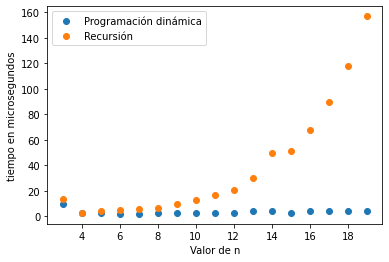

In [218]:
plt.scatter(x = range(3, 20, 1), y = tiempo_dinamico, label = "Programación dinámica")
plt.scatter(x = range(3, 20, 1), y = tiempo_recursion, label = "Recursión")
plt.xlabel("Valor de n")
plt.ylabel("tiempo en microsegundos")
plt.legend(loc="upper left")
plt.show()

Se puede ver como la complejidad temporal ha pasado de ser exponencial en el caso recursivo a constante cuando se aprovecha de las bondades de la programación dinámica. 

## Problema 2

### Escribir una función recursiva ceros que, dada una lista de enteros, devuelva la cantidad de ceros que tiene la lista.

In [219]:
# Definicion de función para contar los ceros en una lista de n valores
def ceros(list): 
    # Caso base: si la lista está vacía devuelvo un cero
    if not list: 
        return 0  
    # Si el valor inicial es cero, se agrega una unidad a la cuenta más la recursión sobre el siguiente valor de la lista
    if (list[0] == 0): 
        return 1 + ceros(list[1:]) 
    # Caso contrario solo se llama la función sin agregar la unidad
    return ceros(list[1:]) 

# Asignacion de la clase Counter a la funcion f()
ceros = Contador(ceros)

In [220]:
ceros ([]) == 0 

True

In [221]:
ceros ([2 ,1 ,4 ,3]) == 0 

True

In [222]:
ceros ([2 ,0 ,1]) == 1 

True

In [223]:
ceros ([2 ,0 ,1 ,0 ,0]) == 3 

True

In [224]:
ceros ([0 ,0 ,0 ,0]) == 4

True

A continuacion de evalúa la complejidad del algortimo al contar la cantidad de llamadas a la funcions

In [225]:
# Definicion de una semilla para asegurar reproducibilidad
random.seed(10)
# Crear una lista vacía para guardar resultados
randomlist = []
# Iterar para generar 1000 listas aleatorias con valores entre 0 y 1000
for i in range(0,1000):
    randomlist.append(random.sample(range(0, 1000), random.randint(5,30)))


In [226]:
# Creacion de una lista para guardar la cantidad de reucrsiones
count = []
# Aplicar la funcin f sobre una secuencia de números creciente
for lista in sorted(randomlist, key=len):
    ceros(lista)
    #print( '# de veces que f() es llamada =', ceros.contador)
    # Agregar la cantidad de recursiones a la lista
    count.append(ceros.contador)


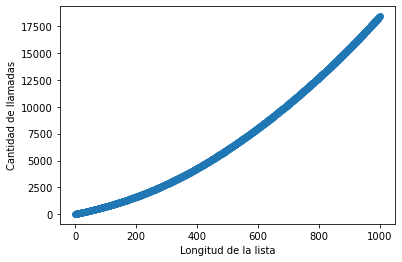

In [227]:
plt.scatter(x = range(len(sorted(randomlist, key=len))), y = count)
plt.xlabel("Longitud de la lista")
plt.ylabel("Cantidad de llamadas")
plt.show()

La complejidad del algortimo es O(len(L)^2). Esto se explica porque en cada llamada a la función ceros, recursivamente se la llama __len(lista)__ veces. A su vez, se vuelve a llamar a la función ceros sobre la lista acotada, lista[1:]. Al considerar ambas etapas se podría aproximar a la complejidad como O(len(L)) * O(len(L))

## Problema 3

Consideremos el algoritmo de fuerza bruta visto en clase para el problema de la mochila.

### ¿En qué circunstancias se puede utilizar este algoritmo, a pesar de su complejidad computacional?

Un algortimo de fuerza bruta puede resolver el problema de la mochila si el número de objetos es relativamente pequeño y la capacidad de la mochia también lo es. Esto se debe a que el algortimo consume mucho tiempo y su complejidad crece exponencialmente con el número de objetos o la capacidad de la mochila. 
Dado que algortimo evalúa todas las posibles soluciones para tratar de encontrar la mejor, si las variables no son finitas, el algortimo no terminaría nunca.

## Si agregamos una poda a este algoritmo, tenemos un algoritmo de backtracking. ¿Es cierto que siempre es conveniente utilizar un algoritmo de backtracking por sobre un algoritmo de fuerza bruta?

No siempre es la mejor opción. Frecuentemente los algortimos de fuerza bruta son más simples y fáciles de implementar que los de backtracking por lo que existen tradeoffs para decidir cuál es el mejor camino. Las opciones de backtracking son más eficientes ya que permiten cortar tempranamente largos ciclos de recursión por lo que son preferidos cuando se requiere una muy buena performance. 

En el caso del problema de la mochila, si las combinaciones de objetos pueden ser representadas con reglas que restrinjan la recursión, implementar un algortimo de backtracking no mejoraría mucho la performance. 

### Sobre la base de las heurísticas golosas vistas en clase para el problema de la mochila, ¿cómo se puede plantear un algoritmo de búsqueda local para este problema? No es necesario dar un pseudocódigo para este algoritmo, se pueden dar las ideas en castellano.

Los métodos de búsqueda local parten de una solución inicial y luego realiza pequeños cambios en un vecindario alrededor y elige la opción que más mejora la función de beneficio. En el caso de la mochila, se calcula un coeficiente, relación costo-beneficio, para cada uno de los objetos. En segunda instancia se ordenan de mayor a menor y se seleccionan los objetos comenzando por el primero, continuando hasta que no quepan más objetos en la mochila. Cuando el objeto n no entra, pasa al objeto n+1 hasta que no entren más objetos en la mochila o no haya más objetos. En resumen la heurística funcionaría de la siguiente manera:

* 1. Generación solución inicial. 
* 2. Evaluación de la solución inicial. 
* 3. Generación de todos los posibles cambios incrementales para la solución en el vecindario.
* 4. Usar la heurística para evaluar cada uno de los cambios del vecindario.
* 5. Elegir el cambio que mejora más la solución. 
* 6. Aplicar el cambio elegido a la solución inicial. 
* 7. Repetir pasos 2-6 hasta que no haya mejoras o la mochilla se llene o no haya más objetos. 

Ejemplo de pseudocódigo para el problema de la mochila. 